In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
url = 'https://www.gutenberg.org/cache/epub/1399/pg1399-images.html'

page = requests.get(url)

soup = BeautifulSoup(page.text, 'html')


In [3]:
soup.head.title


<title>The Project Gutenberg eBook of Anna Karenina, by Leo Tolstoy</title>

In [4]:
chapters = soup.find_all('h3')
allChapters = [x.text for x in chapters]
print(allChapters)

['Chapter 1', 'Chapter 2', 'Chapter 3', 'Chapter 4', 'Chapter 5', 'Chapter 6', 'Chapter 7', 'Chapter 8', 'Chapter 9', 'Chapter 10', 'Chapter 11', 'Chapter 12', 'Chapter 13', 'Chapter 14', 'Chapter 15', 'Chapter 16', 'Chapter 17', 'Chapter 18', 'Chapter 19', 'Chapter 20', 'Chapter 21', 'Chapter 22', 'Chapter 23', 'Chapter 24', 'Chapter 25', 'Chapter 26', 'Chapter 27', 'Chapter 28', 'Chapter 29', 'Chapter 30', 'Chapter 31', 'Chapter 32', 'Chapter 33', 'Chapter 34', 'Chapter 1', 'Chapter 2', 'Chapter 3', 'Chapter 4', 'Chapter 5', 'Chapter 6', 'Chapter 7', 'Chapter 8', 'Chapter 9', 'Chapter 10', 'Chapter 11', 'Chapter 12', 'Chapter 13', 'Chapter 14', 'Chapter 15', 'Chapter 16', 'Chapter 17', 'Chapter 18', 'Chapter 19', 'Chapter 20', 'Chapter 21', 'Chapter 22', 'Chapter 23', 'Chapter 24', 'Chapter 25', 'Chapter 26', 'Chapter 27', 'Chapter 28', 'Chapter 29', 'Chapter 30', 'Chapter 31', 'Chapter 32', 'Chapter 33', 'Chapter 34', 'Chapter 35', 'Chapter 1', 'Chapter 2', 'Chapter 3', 'Chapter 4',

In [5]:
#making a list with all the text composed of paragraphs
paragraphs = [para.get_text(strip=True, separator=" ") for para in soup.find_all('p')]
len(paragraphs)

7443

In [6]:
print(paragraphs[605])

“I know him by reputation and by sight. I know that he’s clever,
learned, religious somewhat.... But you know that’s not ... not in my
line, ” said Vronsky in English.


In [7]:
# setting strings to lowercase and removing whitespace characters
_paragraphs_ = [x.lower() for x in paragraphs]
words = [x.replace("\r\n"," ") for x in _paragraphs_]

words[3001]

'“there ... in the outer room,” answered the old man, bundling together the harness he had taken off, and flinging it on the ground. “you can put them on, while they have dinner.”'

In [8]:
#tokenize words and filter out stopwords
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(" ".join(words))

filtered_words = [w for w in word_tokens if not w in stop_words]
 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mattmeredith/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mattmeredith/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
import regex as re

r = re.compile("[a-z]+")
r2 = re.compile("[\.]+")
filtered_list = list(filter(r.match, filtered_words))

print(len(word_tokens))
print(len(filtered_words))
print(len(filtered_list))


429809
234002
159818


In [10]:
from nltk import FreqDist

fdist = FreqDist(filtered_list)
print(fdist.most_common(50))

[('said', 2721), ('levin', 1608), ('one', 1209), ('would', 1044), ('could', 970), ('vronsky', 852), ('anna', 818), ('go', 674), ('kitty', 669), ('come', 668), ('went', 660), ('know', 659), ('alexey', 629), ('well', 622), ('see', 604), ('alexandrovitch', 570), ('thought', 563), ('time', 558), ('felt', 553), ('man', 550), ('stepan', 549), ('arkadyevitch', 547), ('eyes', 547), ('face', 539), ('yes', 530), ('nothing', 523), ('though', 518), ('like', 510), ('say', 502), ('little', 456), ('life', 450), ('love', 425), ('something', 424), ('still', 424), ('saw', 421), ('without', 420), ('came', 420), ('must', 415), ('away', 413), ('never', 410), ('going', 407), ('wife', 406), ('made', 402), ('old', 391), ('knew', 390), ('hand', 380), ('long', 366), ('began', 365), ('back', 355), ('looking', 353)]


In [11]:
# reunite tokens into single string and further clean punctuation
w1 = " ".join(filtered_list)

w1 = re.sub(r'[\.]', "", w1)
w1 = re.sub(r'[\—-]', " ", w1)
w1dist = FreqDist(w1)
type(w1)

str

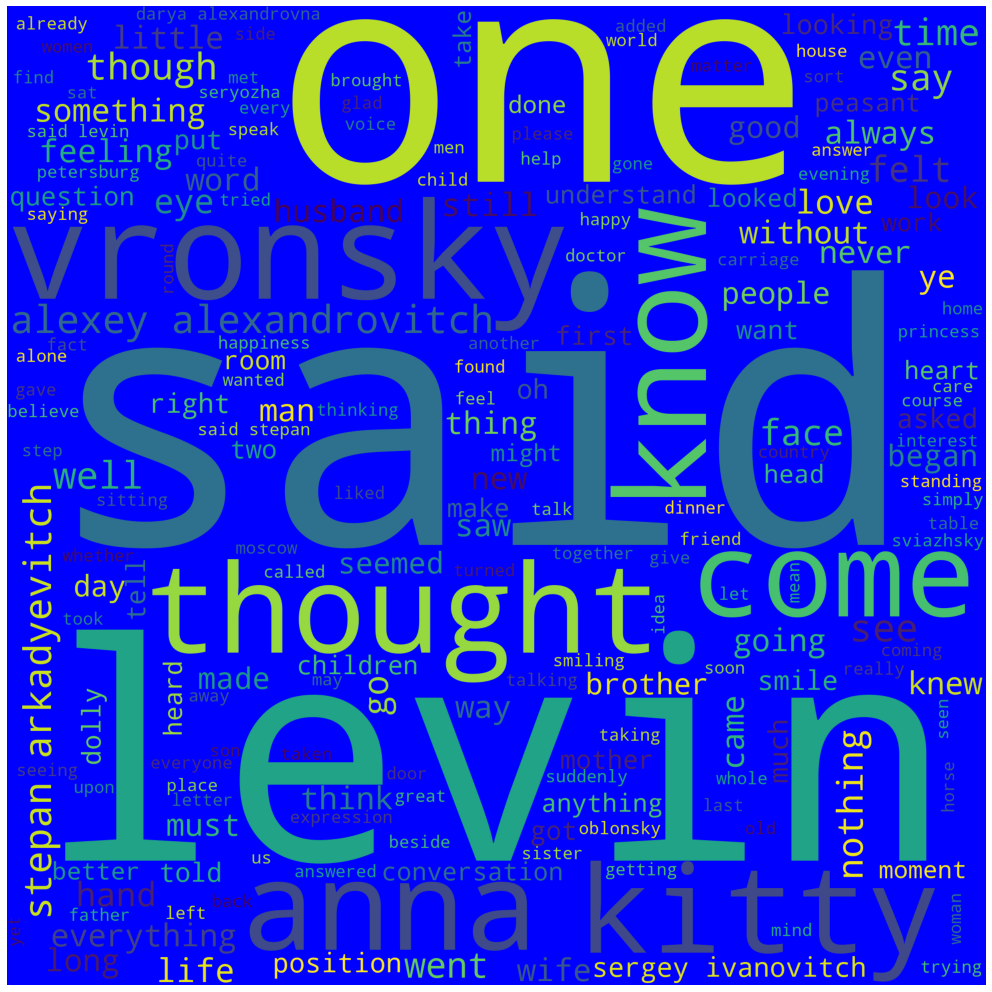

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

my_wordcloud = WordCloud(width=2000, height=2000, background_color='blue', min_font_size=10).generate(w1)
plt.figure(figsize=(18, 18), facecolor=None)
plt.imshow(my_wordcloud)
plt.axis('off')
plt.savefig("wordcloud-blue.jpg", dpi=300)